## Load the essential packages for exploratory data analysis (EDA)

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings

warnings.filterwarnings("ignore")

## Extracting data from the UCI repository. 

In [2]:
df = pd.read_csv('glass.csv', header = None, names=["ID", "RI", "Na2O", "MgO", "Al2O3", "SiO2", "K2O", "CaO", "BaO", "Fe2O3", "Tipo"])
df.head(10)

,ID,RI,Na2O,MgO,Al2O3,SiO2,K2O,CaO,BaO,Fe2O3,Tipo
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


## Checking if there are null values

In [7]:
df.isnull().sum()

ID       0
RI       0
Na2O     0
MgO      0
Al2O3    0
SiO2     0
K2O      0
CaO      0
BaO      0
Fe2O3    0
Tipo     0
dtype: int64

## Checking if there are duplicated rows

In [8]:
df.duplicated().sum()

0

## Getting information about the data
#### Features, number of observations, if any duplicate is present, data types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na2O    214 non-null    float64
 3   MgO     214 non-null    float64
 4   Al2O3   214 non-null    float64
 5   SiO2    214 non-null    float64
 6   K2O     214 non-null    float64
 7   CaO     214 non-null    float64
 8   BaO     214 non-null    float64
 9   Fe2O3   214 non-null    float64
 10  Tipo    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


## Getting insight about the statistics

#### Here we can check the position, dispersion, and shape of the data.
#### Note that most data follows a normal distribution (mean close to 50%). 
#### The amplitude is different for each of the features, then we will normalize/standardize before training the model

In [17]:
df.describe()

,ID,RI,Na2O,MgO,Al2O3,SiO2,K2O,CaO,BaO,Fe2O3,Tipo
count,214.000,214.000,214.000,214.000,214.000,214.000,214.000,214.000,214.000,214.000,214.000
mean,107.500,1.518,13.408,2.685,1.445,72.651,0.497,8.957,0.175,0.057,2.780
std,61.921,0.003,0.817,1.442,0.499,0.775,0.652,1.423,0.497,0.097,2.104
min,1.000,1.511,10.730,0.000,0.290,69.810,0.000,5.430,0.000,0.000,1.000
25%,54.250,1.517,12.908,2.115,1.190,72.280,0.122,8.240,0.000,0.000,1.000
50%,107.500,1.518,13.300,3.480,1.360,72.790,0.555,8.600,0.000,0.000,2.000
75%,160.750,1.519,13.825,3.600,1.630,73.088,0.610,9.172,0.000,0.100,3.000
max,214.000,1.534,17.380,4.490,3.500,75.410,6.210,16.190,3.150,0.510,7.000


## Checking how many observations belong to each class

#### Since some classes have only a few observations, the model needs to consider that

<AxesSubplot:xlabel='Tipo', ylabel='count'>

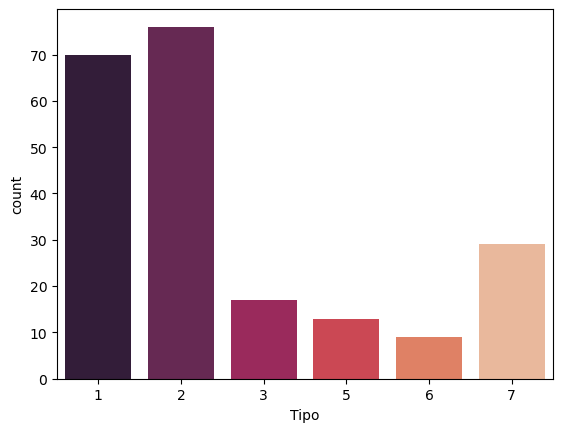

In [18]:
sns.countplot(x="Tipo", data=df, palette="rocket")

## Data visualization

#### Here we can have a sight of the data distribution in a more insightful manner.
#### It is possible to show only a few features instead of the whole dataset. For this, I used the following code.

## 1) PairPlots

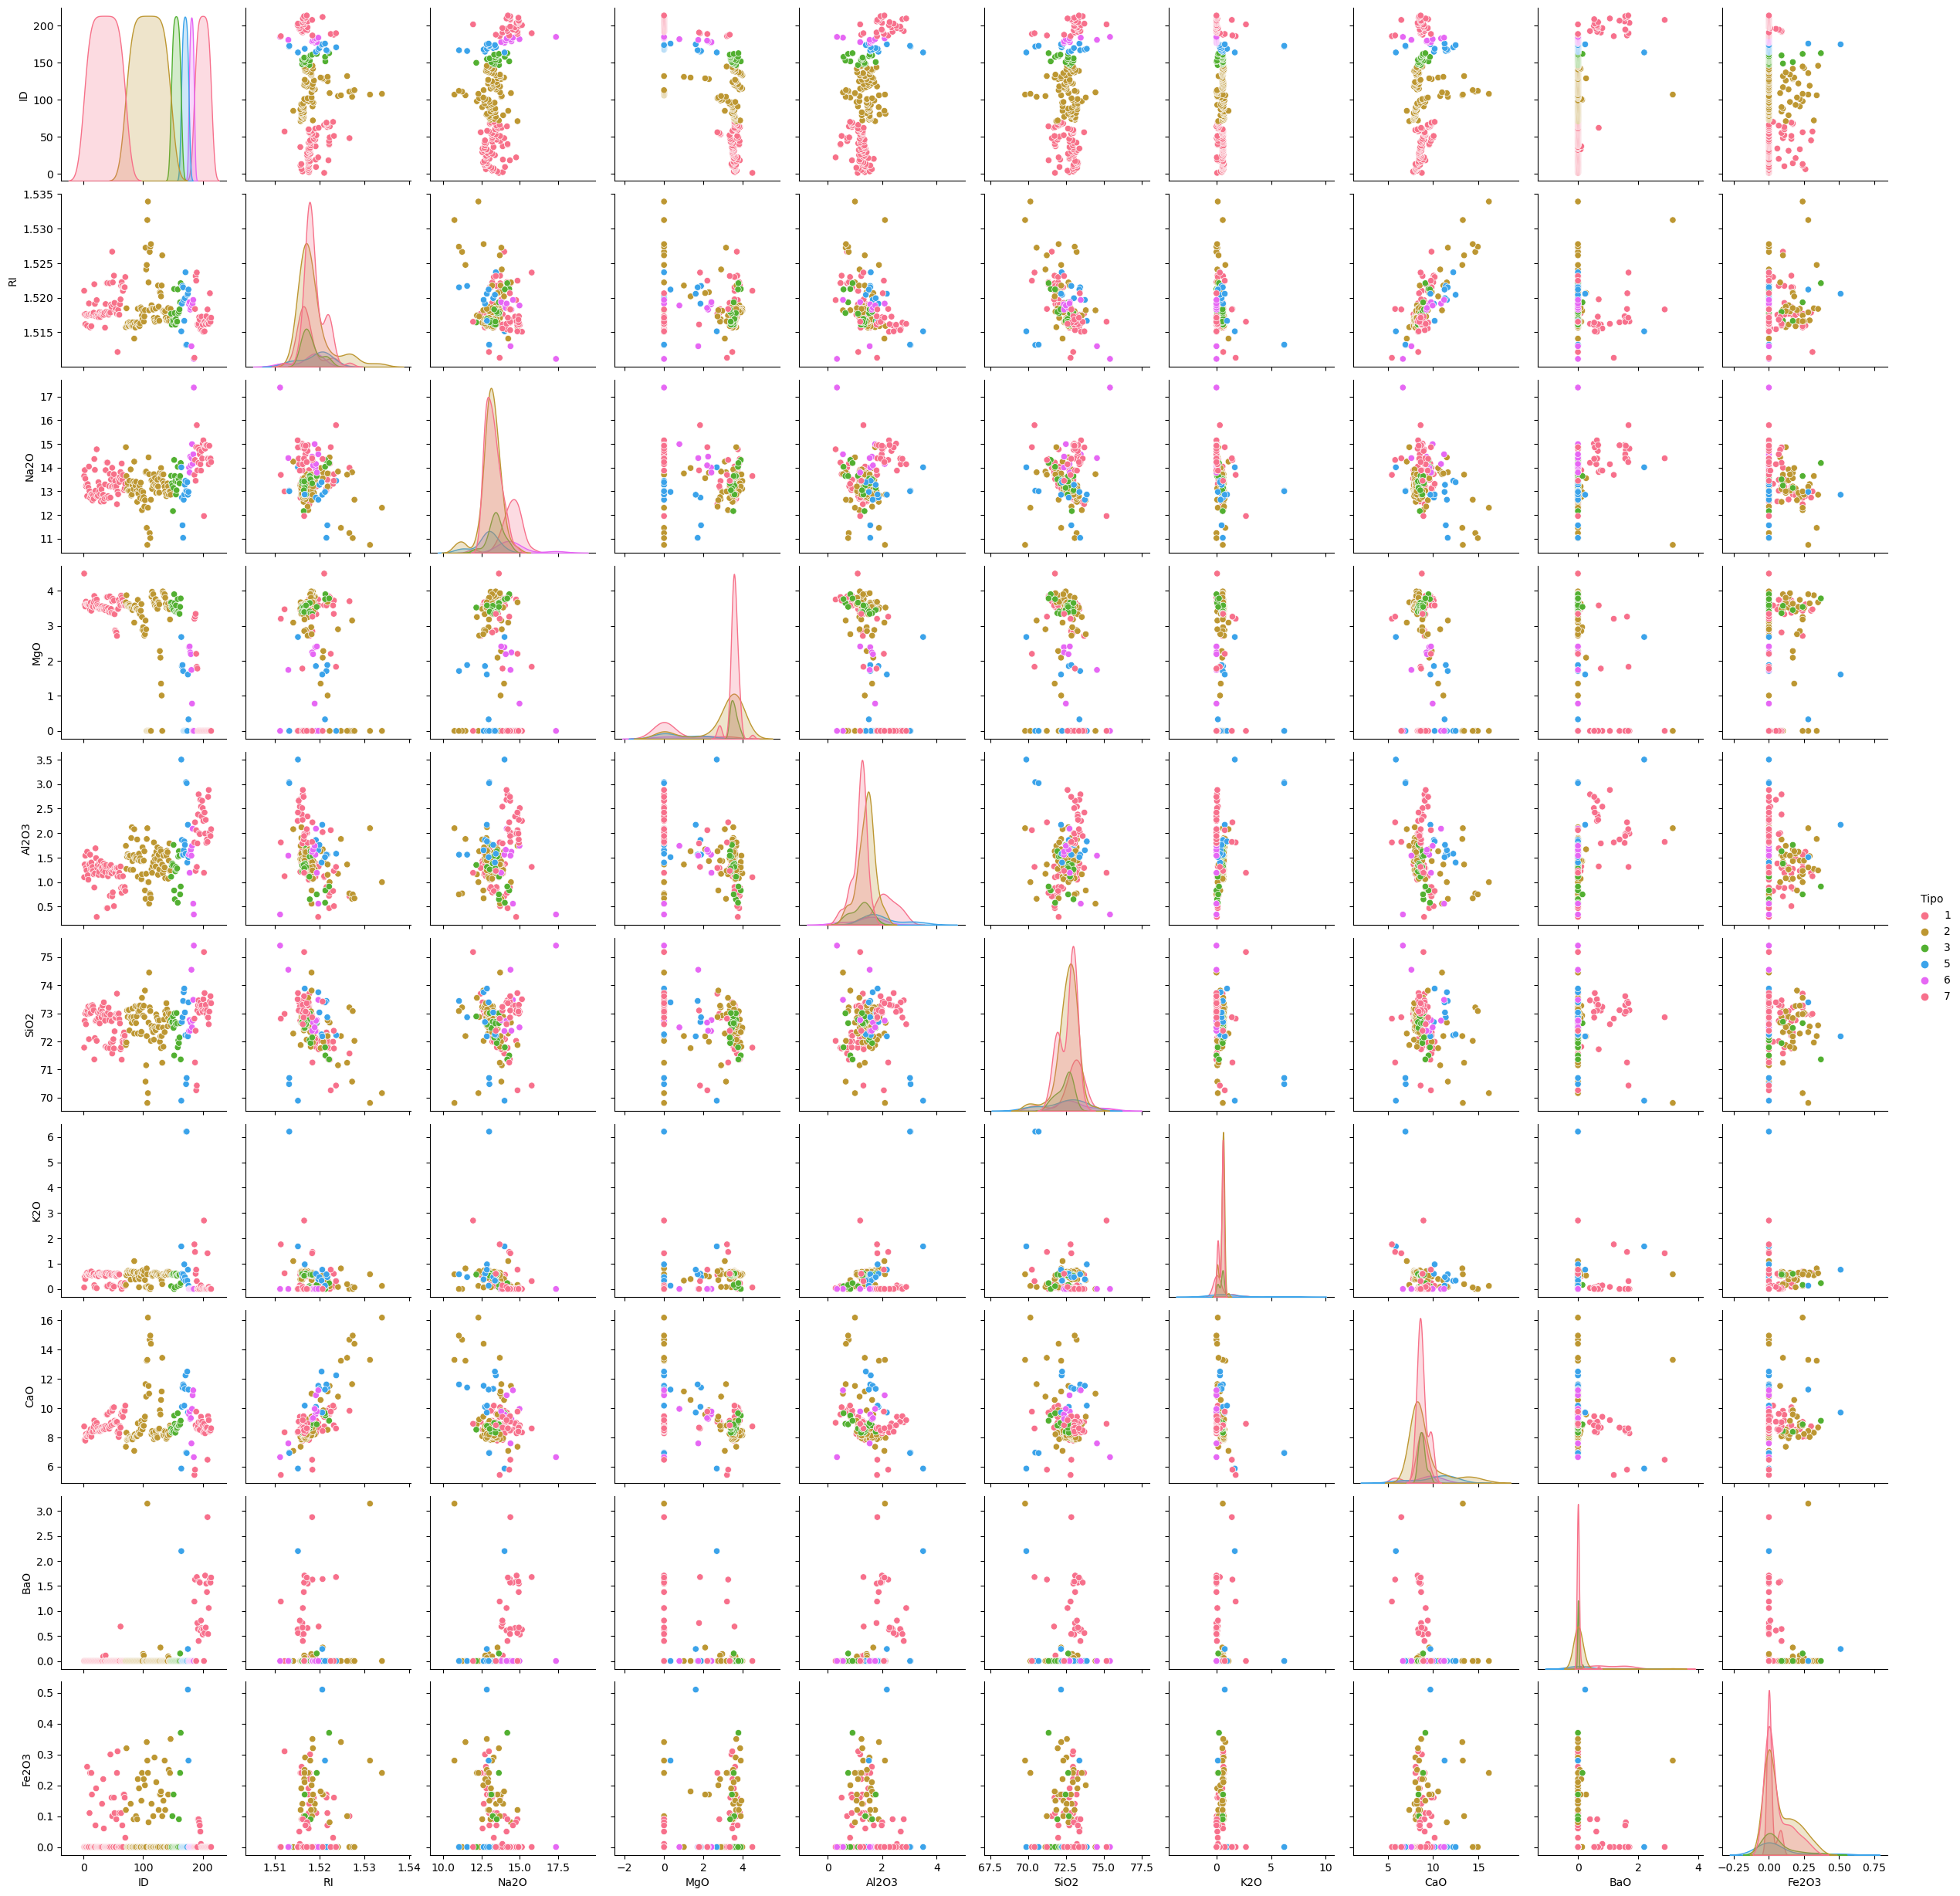

In [19]:
sns.pairplot(df, hue = "Tipo", palette = "husl")

### with the following commented code I generate the pairplot graphs just for RI, Na2O, Fe2O3 and Tipo (you can try)
# sns.pairplot(df[["RI", "Na2O", "Fe2O3", "Tipo"]], hue = "Tipo", palette = "husl");
# plt.show()

## 2) Histograms

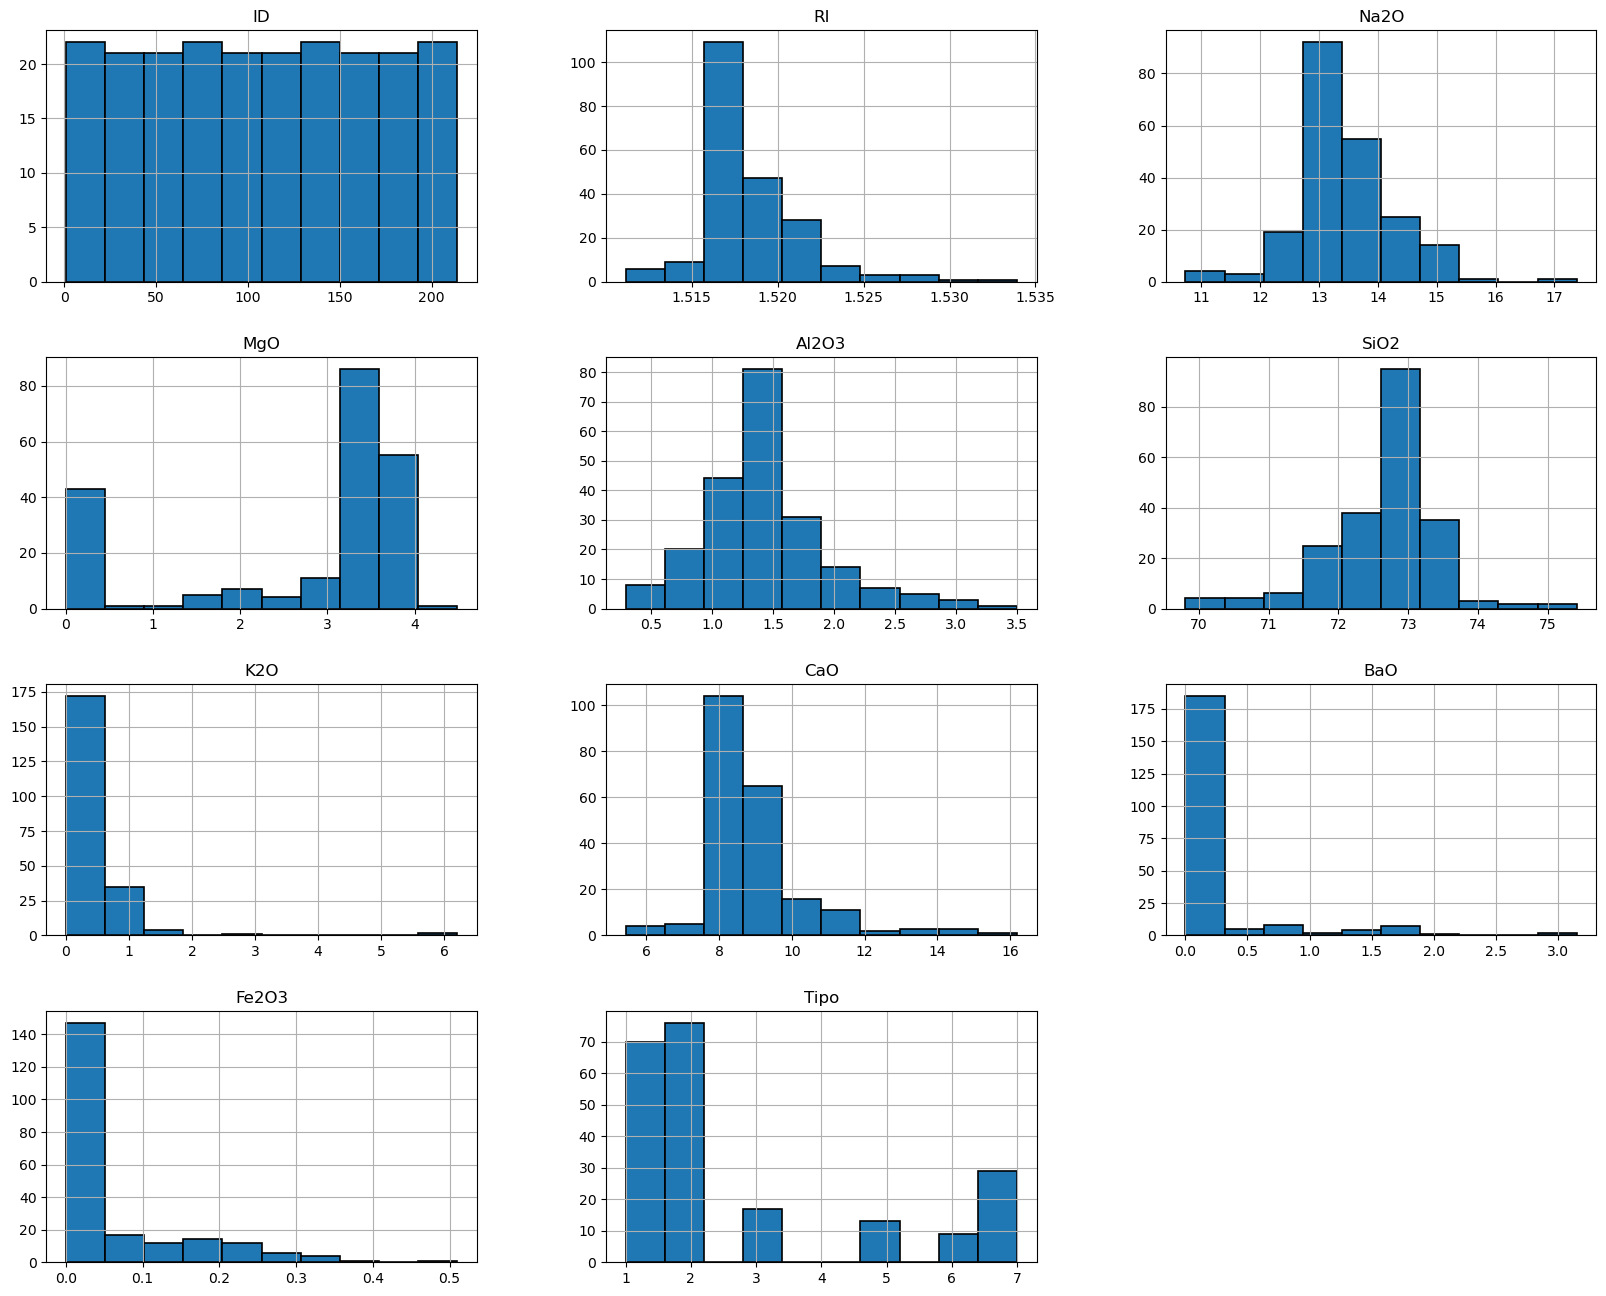

In [10]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(20,16));
plt.show()

## 3) Violin Plots

#### Here, I just plot some of the features but feel free to include the remaining features

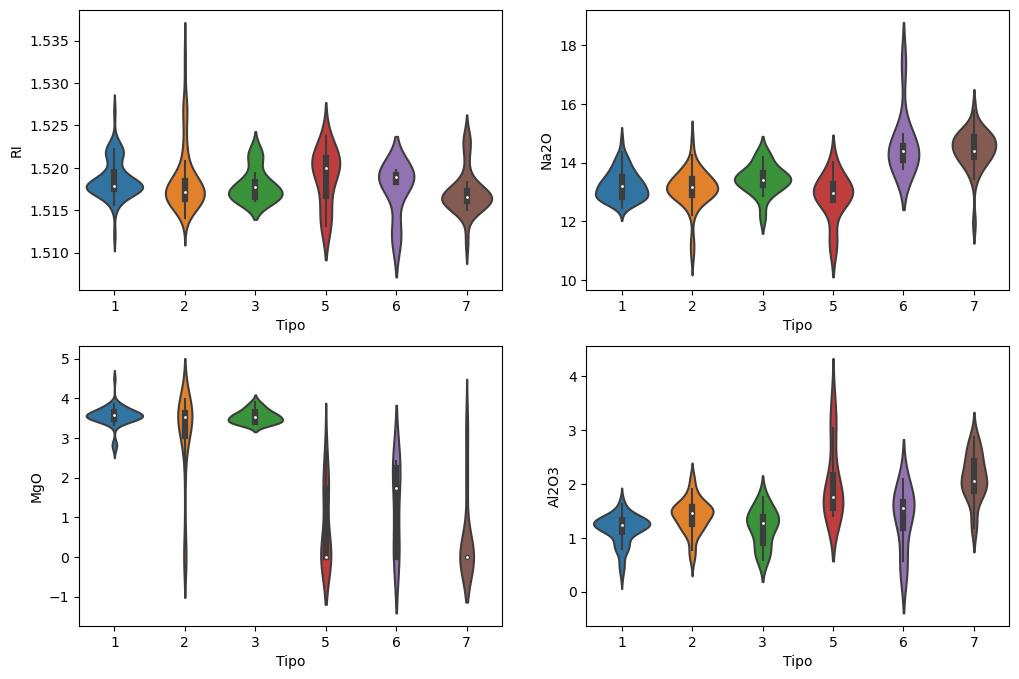

In [11]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.violinplot(x="Tipo", y="RI", data=df)
plt.subplot(2,2,2)
sns.violinplot(x="Tipo", y="Na2O", data=df)
plt.subplot(2,2,3)
sns.violinplot(x="Tipo", y="MgO", data=df)
plt.subplot(2,2,4)
sns.violinplot(x="Tipo", y="Al2O3", data=df)
plt.show()

## Checking the skewness of the data

#### It gives information about the asymmetry of the data
#### Useful to check for possible outliers and how they change the distribution

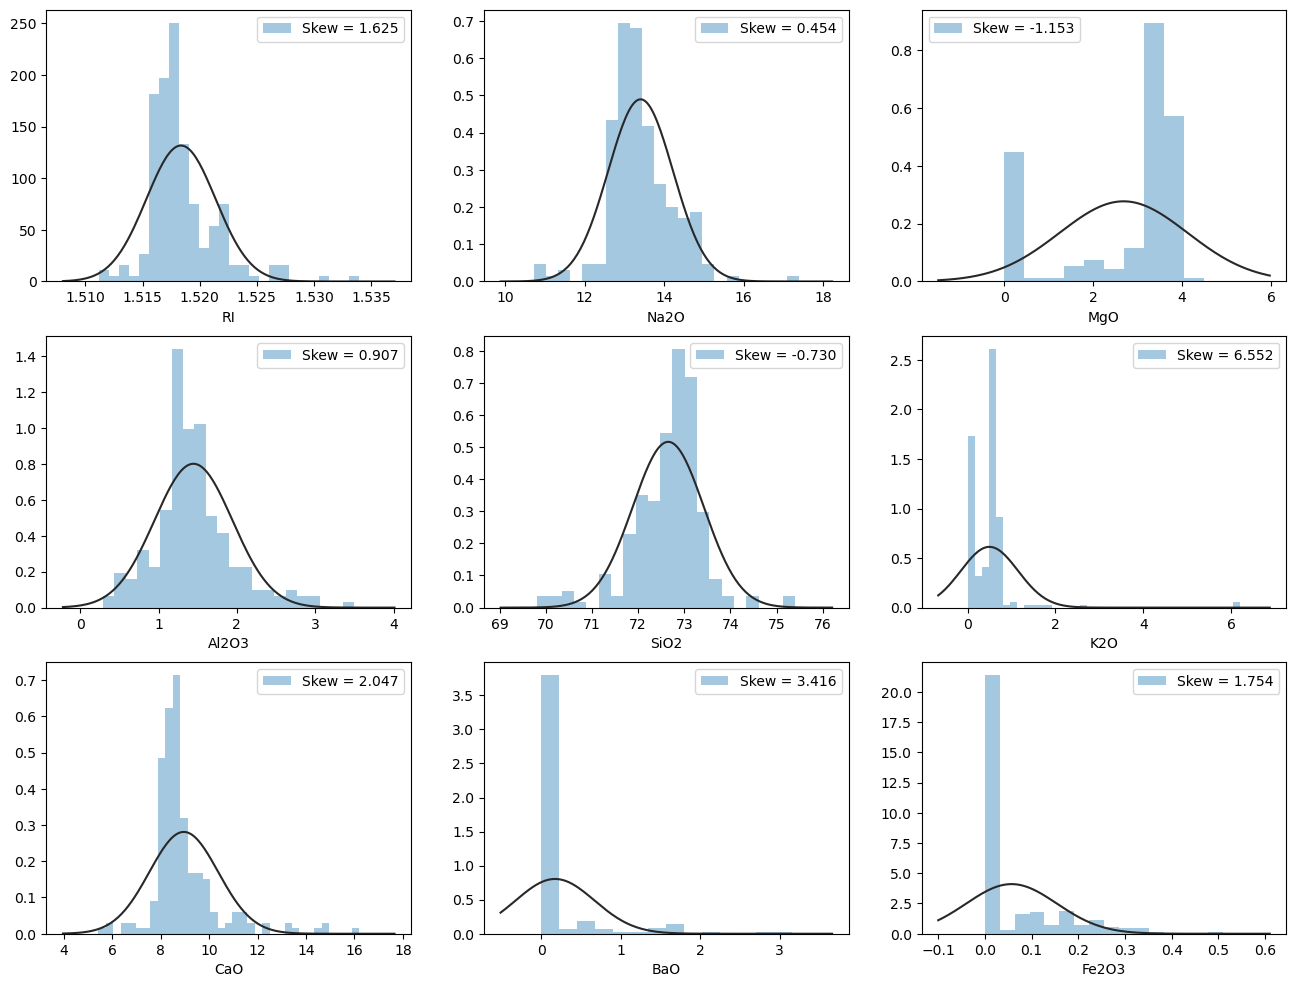

In [22]:
cols = ["RI", "Na2O", "MgO", "Al2O3", "SiO2", "K2O", "CaO", "BaO", "Fe2O3"]
fig,ax = plt.subplots(3,3, figsize=(16, 12))
ax = ax.flatten()
i = 0
for col in cols:
    skew = df[col].skew()
    sns.distplot(df[col], ax = ax[i], fit= stats.norm, kde=False, label='Skew = %.3f' %(skew))
    ax[i].legend(loc='best')
    i += 1
plt.show()

## Correlation plot to check which features have a strong correlation between them

#### We can improve the model by removing redundant information by taking off correlated features

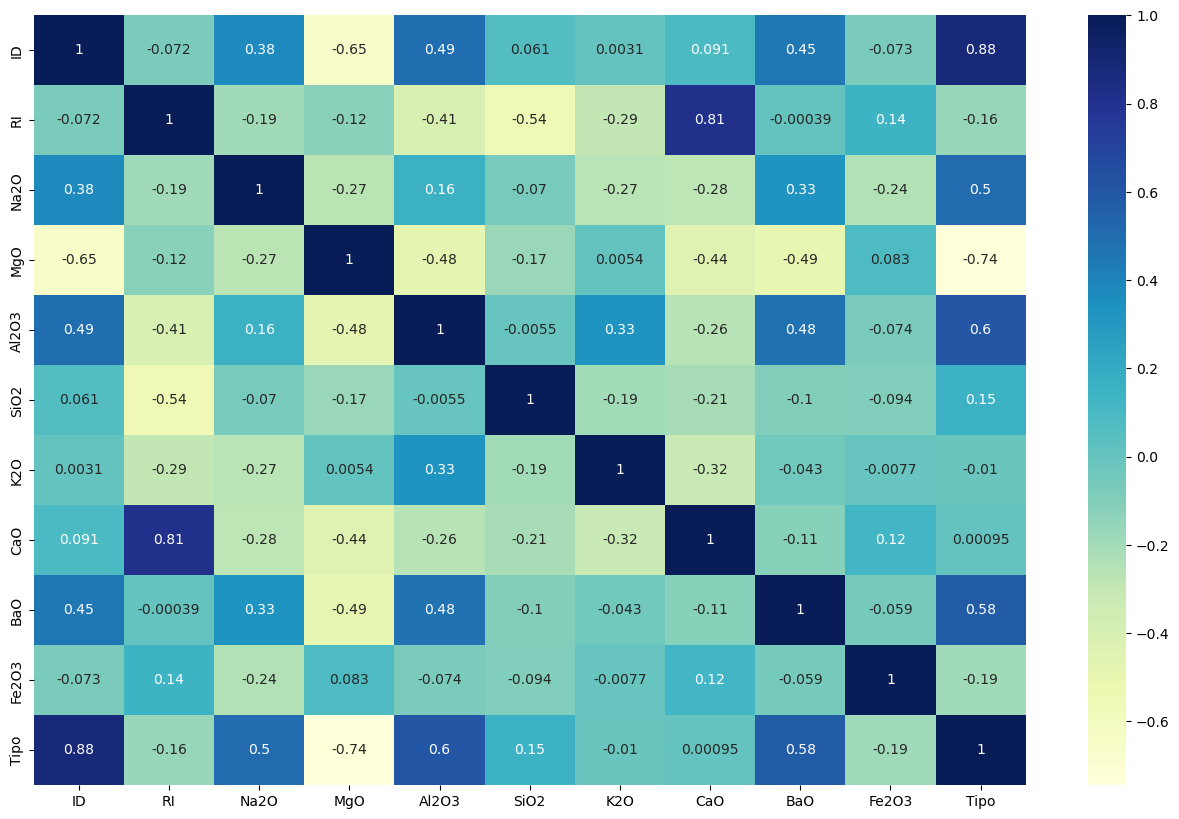

In [14]:
pd.options.display.float_format = '{:,.3f}'.format
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

## Final notes on EDA

#### 1) The ID feature does not give information about the data and must be removed
#### 2)The data has a normal distribution
#### 3) Different features show different range, mean, and standard deviation. We will treat that in further steps